<a href="https://colab.research.google.com/github/josephgonz12/MAS4115/blob/main/vector_space_model_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

# Interesting property of Text Data (Zipf Law): Distribution of word frequencies



In [1]:
import nltk
from nltk.corpus import brown as english, cess_esp as spanish
nltk.download('brown')
nltk.download('cess_esp')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Unzipping corpora/cess_esp.zip.


True

In [3]:
from collections import Counter # for counting stuff
import matplotlib.pyplot as plt # for plotting, will discuss in detail later

def plot_common_word_histogram(s, top_k=40, with_approx=True):
  words = get_documents_term_list(s)
  cntr = Counter(words)
  words, counts = zip(*cntr.most_common(top_k))
  proba = np.array(counts)/np.sum(counts)
  plt.bar(words, proba);
  plt.xticks(rotation='vertical')
  if with_approx:
    ranks = np.linspace(1,1+top_k,top_k)
    plt.plot(ranks-1, 0.3/(ranks+3), c='yellow')

## On our silly dataset

In [4]:
def strip(txt):
  things_to_strip = ".,;`'\"-_!?*+" # now with super basic stemming
  return txt.strip(things_to_strip)


def get_documents_term_list(doc):
  '''
  Gets all the documents' terms in order, after some basic cleanup.
  '''
  return [res for x in doc.split() if (res:= strip(x).lower())]


def get_characteristic_words(corpus):
  '''
  Here we just cheat a little and get a predefined list!
  '''
  # return sorted(set.union(*map(get_terms, corpus)))
  return [strip(x) for x in keywords]


def get_term_dictionary(corpus):
  '''
  Returns a mapping from a term (string) to its unique index.
  '''
  terms = get_characteristic_words(corpus)
  # no need to understand it... for now
  return dict(zip(terms, range(len(terms))))

def get_documents_term_vector(doc, term_dict):
  '''
  Creates the term-vector of doc using terms
  in term_dict.
  '''
  term_vector = np.zeros(len(term_dict))
  sum_vector = np.zeros(len(get_documents_term_list(doc)))
  i = 0;
  for term in get_documents_term_list(doc):
    if term in term_dict:
      term_index = term_dict[term]
      term_vector[term_index] += 1
      sum_vector[i] += 1
    i++

  for j in term_vector
  return term_vector


def get_term_vector_matrix(corpus):
  '''
  Returns a matrix of size num_documents x num_characteristic_words
  The i-th row corresponds to the term-vector of the i-th document.
  '''
  term_dict = get_term_dictionary(corpus)
  N = len(term_dict)
  matrix = np.zeros((len(corpus), N))
  for i, doc in enumerate(docs):
    tv = get_documents_term_vector(doc, term_dict)
    matrix[i] = tv
  return matrix


def get_human_readable_term_vector(tv, keywords):
  '''
  Just in case you wanted to print a term vector nicely.
  '''
  return [(keywords[i],cnt) for i, cnt in enumerate(tv) if cnt > 0]

In [5]:
keywords = ["cats", "dogs", "trees", "fields", "binary",
            "photosynthesis", "whiskers", "animals",
            "holes", "nature"]


docs = [
    """The purring of a cat is often associated with contentment,
but it can also indicate pain relief and self-healing. Cats
groom themselves meticulously using their tongues, a behavior
that helps regulate body temperature and establish a sense
of ownership over their territory.""",

    """Dogs, descendants of wolves, have been bred for various
roles, from herding livestock to providing companionship and
support. Their remarkable diversity in size and appearance
is a result of selective breeding, shaping them into
breeds optimized for specific tasks and environments.
Dogs exhibit a strong sense of loyalty and attachment
to their human companions, forming deep bonds of
affection.""",

""" [#1 times 3] The purring of a cat is often associated with contentment,
but it can also indicate pain relief and self-healing. Cats
groom themselves meticulously using their tongues, a behavior
that helps regulate body temperature and establish a sense
of ownership over their territory. The purring of a cat is often associated with contentment,
but it can also indicate pain relief and self-healing. Cats
groom themselves meticulously using their tongues, a behavior
that helps regulate body temperature and establish a sense
of ownership over their territory. The purring of a cat is often associated with contentment,
but it can also indicate pain relief and self-healing. Cats
groom themselves meticulously using their tongues, a behavior
that helps regulate body temperature and establish a sense
of ownership over their territory.""",


    """Deciduous trees shed their leaves in the fall as an
adaptation to conserve water and energy during colder months.
Leaves contain specialized cells called chloroplasts that
use sunlight to convert carbon dioxide and water into
energy-rich carbohydrates, a process known as photosynthesis.
This natural phenomenon is a remarkable example of
ecological adaptation.""",

    """In computer science, a binary tree is a hierarchical
data structure with nodes that have at most two children,
commonly used in search algorithms. Binary trees can be
balanced or unbalanced, impacting the efficiency of
search operations. The concept of binary trees extends
to various applications, including the representation
of hierarchical data in databases and the construction
of efficient data compression algorithms.""",

    """Black holes, predicted by Einstein's theory of
general relativity, have such strong gravitational effects
that nothing, not even light, can escape their grasp.
These enigmatic cosmic objects form when massive stars
undergo gravitational collapse. The intense gravitational
forces near a black hole create a phenomenon known as
time dilation, where time passes more slowly for an
observer near the event horizon than for those further
away.""",

    """Cat whiskers are highly sensitive tactile hairs that
help cats detect changes in their surroundings and navigate
in the dark. These whiskers are embedded deep within the
skin and are connected to nerve endings, allowing cats
to perceive even subtle air movements. Whiskers play
a crucial role in a cat's spatial awareness and ability
to judge whether they can fit through tight spaces.""",

    """Dogs' exceptional sense of smell has been utilized in
tasks like tracking scents, detecting medical conditions,
and even identifying certain cancers. A dog's olfactory
system is incredibly intricate, featuring hundreds of
millions of scent receptors that can detect minute
amounts of odor molecules. This heightened sense of
smell makes dogs invaluable in various fields, from
search and rescue operations to medical diagnostics.""",

    """Ancient cultures revered sacred trees as symbols of
life and growth, often attributing spiritual significance
to their towering presence. Trees like the oak, with its
strong and resilient wood, were often associated with
strength and protection. The symbolism of trees varies
across cultures, but their role as providers of shelter,
food, and resources has remained a constant throughout
human history.""",

    """A spanning tree of a graph is a subgraph that includes
all the vertices and is also a tree, crucial in network
design and optimization. Spanning trees are employed
in various computer science applications, such as
establishing efficient communication networks and
designing fault-tolerant systems. The concept of
spanning trees extends beyond the realm of graphs and
has implications in both computer science and engineering.""",

    """Worm holes, hypothetical shortcuts in spacetime, captivate
the imagination of physicists as potential portals for
interstellar travel. These theoretical constructs
are akin to tunnels connecting distant points in space,
potentially allowing for faster-than-light travel. The
concept of worm holes emerged from the equations of
general relativity, but their existence and viability
remain speculative topics in the realm of theoretical
physics.""",

    """Known for their loyalty, dogs have been used as
service animals for tasks like guiding the visually impaired
and assisting individuals with disabilities. Service dogs
undergo rigorous training to perform specific tasks,
such as guiding individuals through obstacles and alerting
them to potential dangers. These highly trained dogs
enhance the quality of life for people with various
disabilities, fostering greater independence and
confidence.""",

    """The growth rings of trees, visible in cross-sections
of trunks, hold records of environmental changes and can
provide insights into historical climates. Each ring
represents a year of growth, with alternating patterns
of light and dark reflecting variations in growth
conditions. Dendrochronology, the study of tree rings,
enables scientists to reconstruct past climate patterns,
understand ecological shifts, and even date historical
artifacts and structures.""",

    """In graph theory, a rooted tree designates one node
as the root and assigns a parent-child relationship, useful
in representing hierarchical structures. Trees in graph
theory find applications in diverse fields, including
database organization, computer network topologies,
and evolutionary biology. The tree structure simplifies
the representation and manipulation of complex relationships,
making it a fundamental concept in various domains.""",

    """Sink holes, formed by the collapse of underground cavities,
can emerge suddenly and pose significant challenges to urban
planning. These geological phenomena occur when soluble rock
layers dissolve over time, leaving voids that can cause the
ground above to collapse. Sink holes can range in size from
small depressions to massive craters, and their occurrence
has prompted the development of strategies to detect,
prevent, and mitigate their impact.""",

    """Cat whiskers are highly sensitive tactile hairs that
help cats detect changes in their surroundings and navigate
in the dark. These specialized hairs, known as vibrissae,
contain sensory nerve endings that allow cats to sense
objects and obstacles without relying solely on their
vision. Vibrissae are found on various parts of a cat's
body, including the face, paws, and even the backs of
their forelegs.""",

    """Dogs' barking, ranging from alert barks to play barks,
is a complex form of communication that expresses various
emotions and intentions. Dogs use barking to convey
excitement, fear, warning, or even to solicit attention.
The tone, duration, and frequency of barks can vary
significantly, and dogs often modify their barking
patterns based on their surroundings and interactions
with humans and other animals.""",

    """Cats are known for their independent nature, while dogs are known for their loyalty and companionship.
Cats are self-sufficient and content alone, while dogs thrive on social interaction and attention.
Cats groom themselves meticulously using whiskers, while dogs have a remarkable sense of smell for various tasks.
Both animals bring unique qualities to their owners.
""",

    """Decision trees are a predictive modeling tool that
recursively divides data into subsets based on features,
used extensively in machine learning. Each internal node
represents a decision based on a specific feature, guiding
the data down different branches until reaching a leaf node,
which represents the predicted outcome. Decision trees
provide transparency in decision-making processes and
find applications in various fields, from medical diagnosis
to financial forecasting"""
]

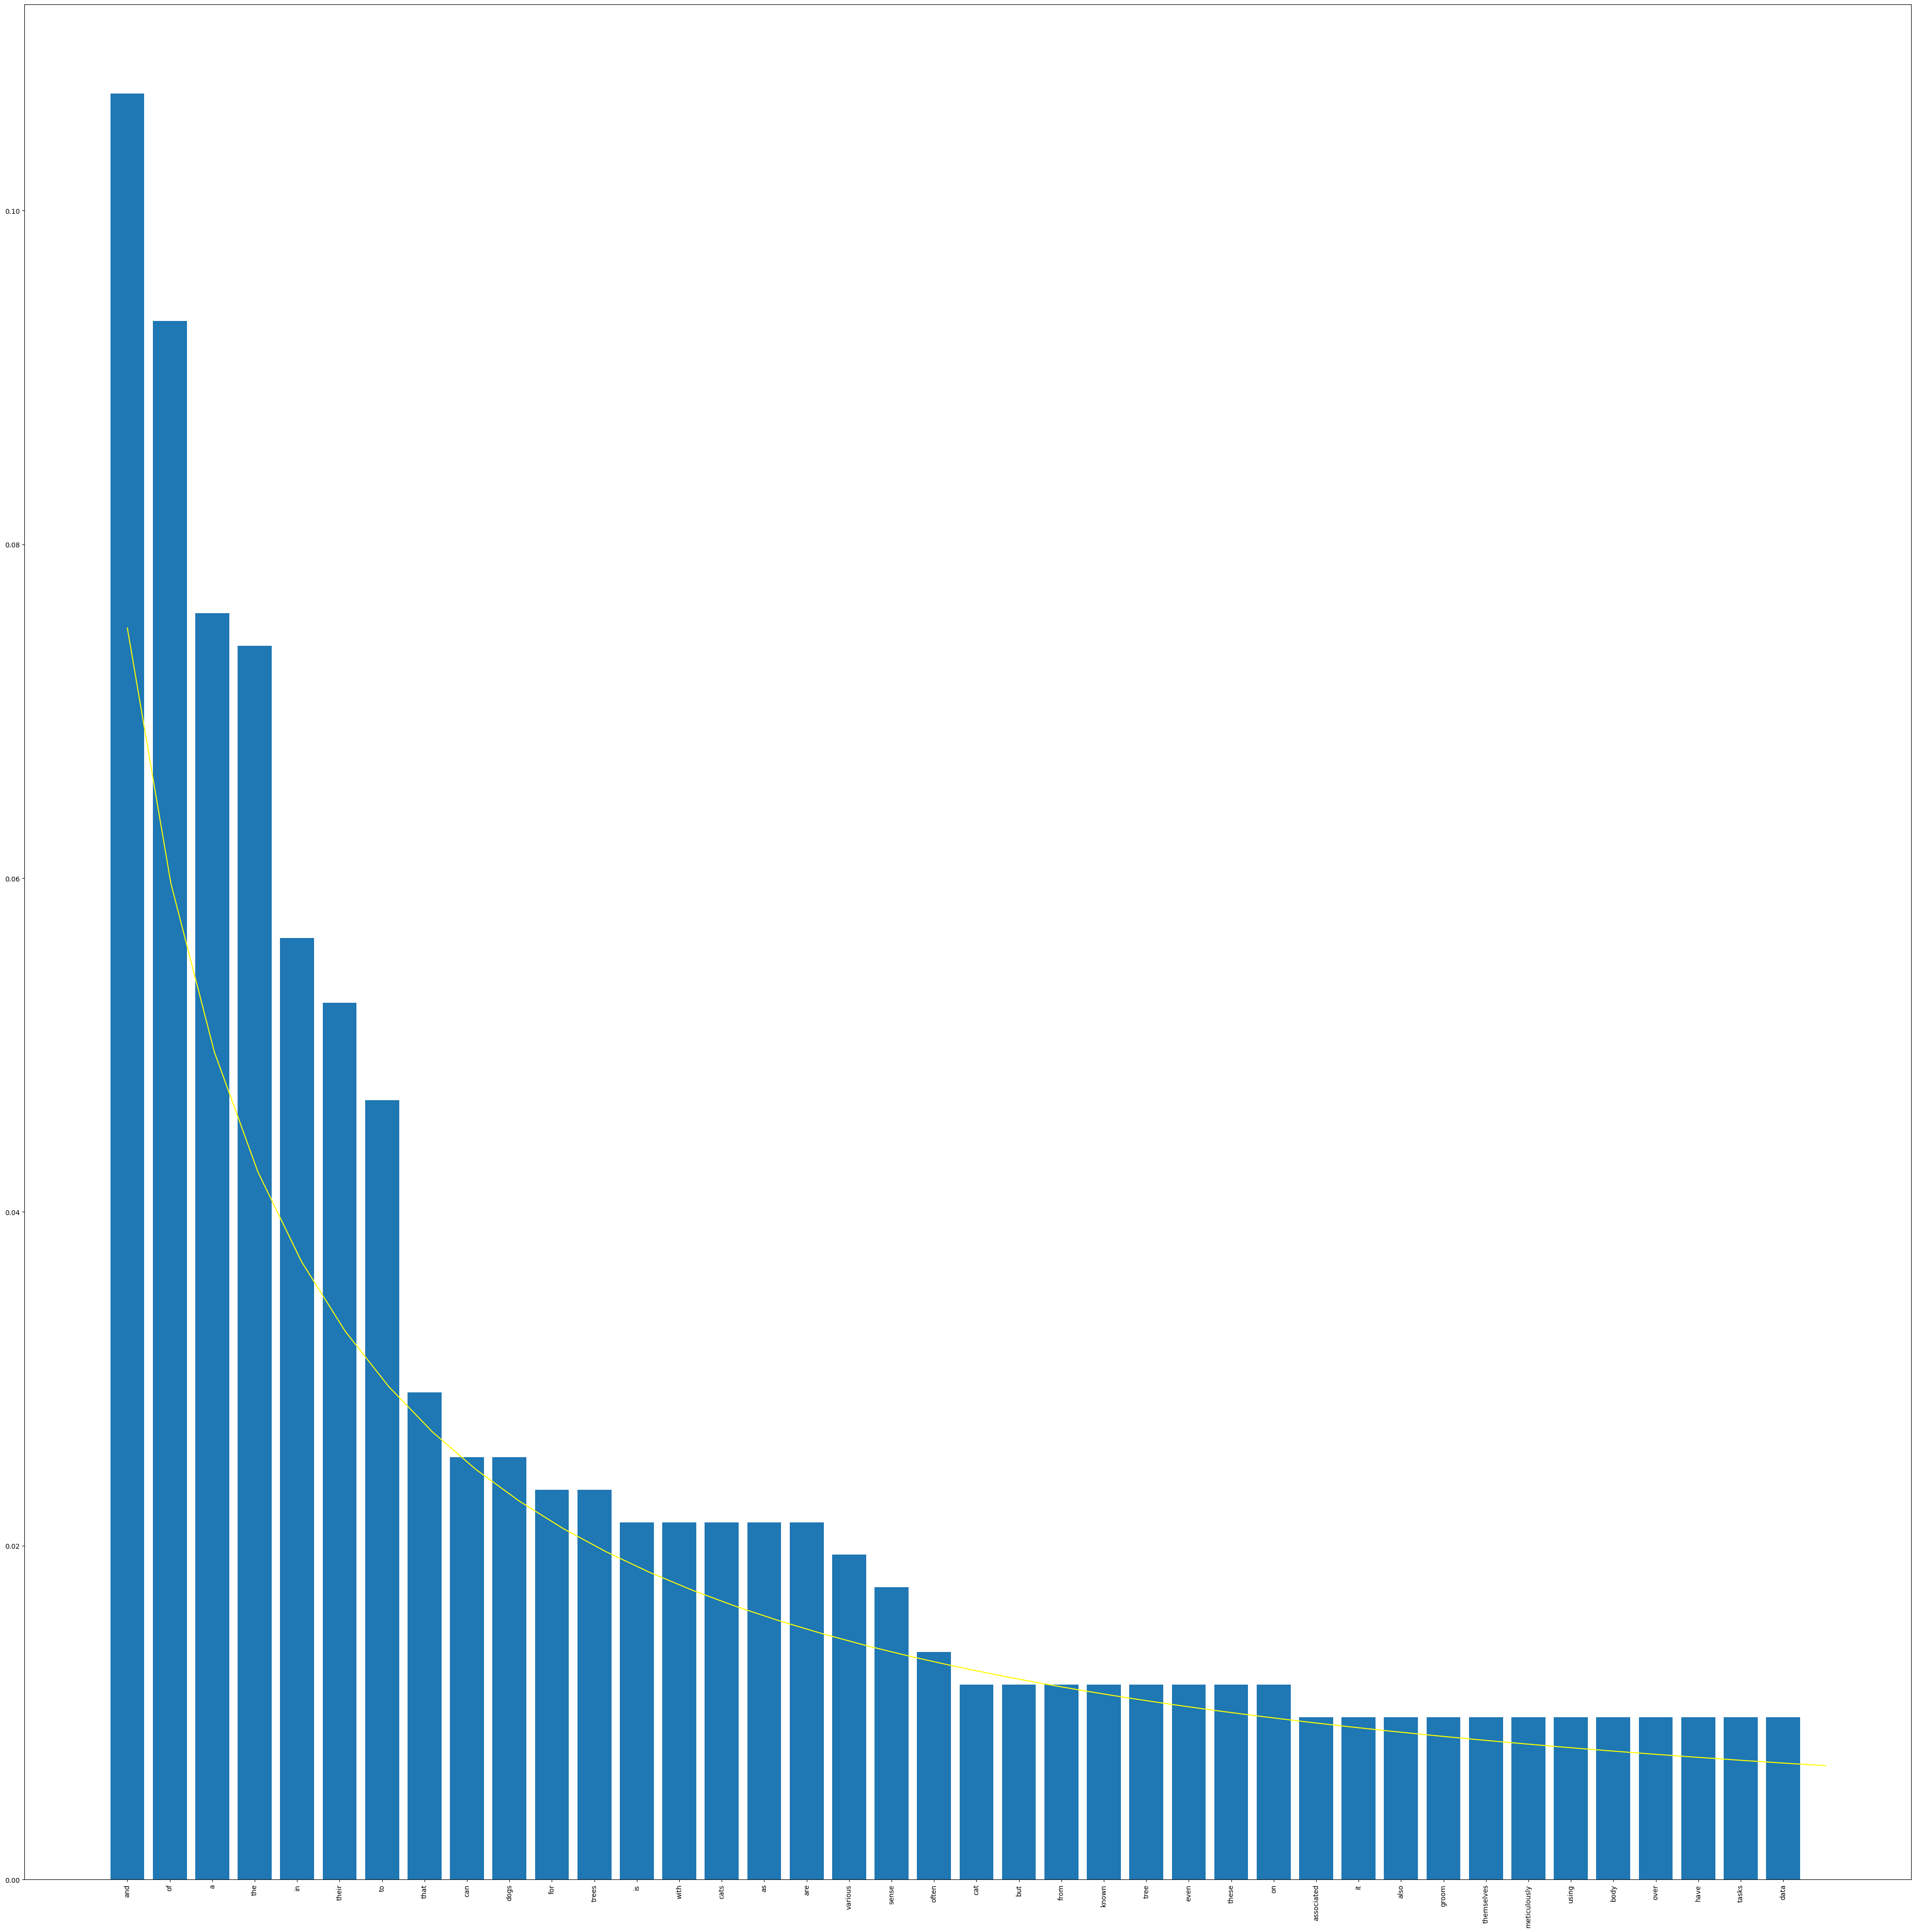

In [6]:
plt.figure(figsize=(50, 50))
plot_common_word_histogram(" ".join(docs))

## And on a more serious dataset

Brown Corpus: https://en.wikipedia.org/wiki/Brown_Corpus

The distribution you see is pretty much shared across any languages: https://en.wikipedia.org/wiki/Zipf%27s_law




## Question: Why do we see this pattern?

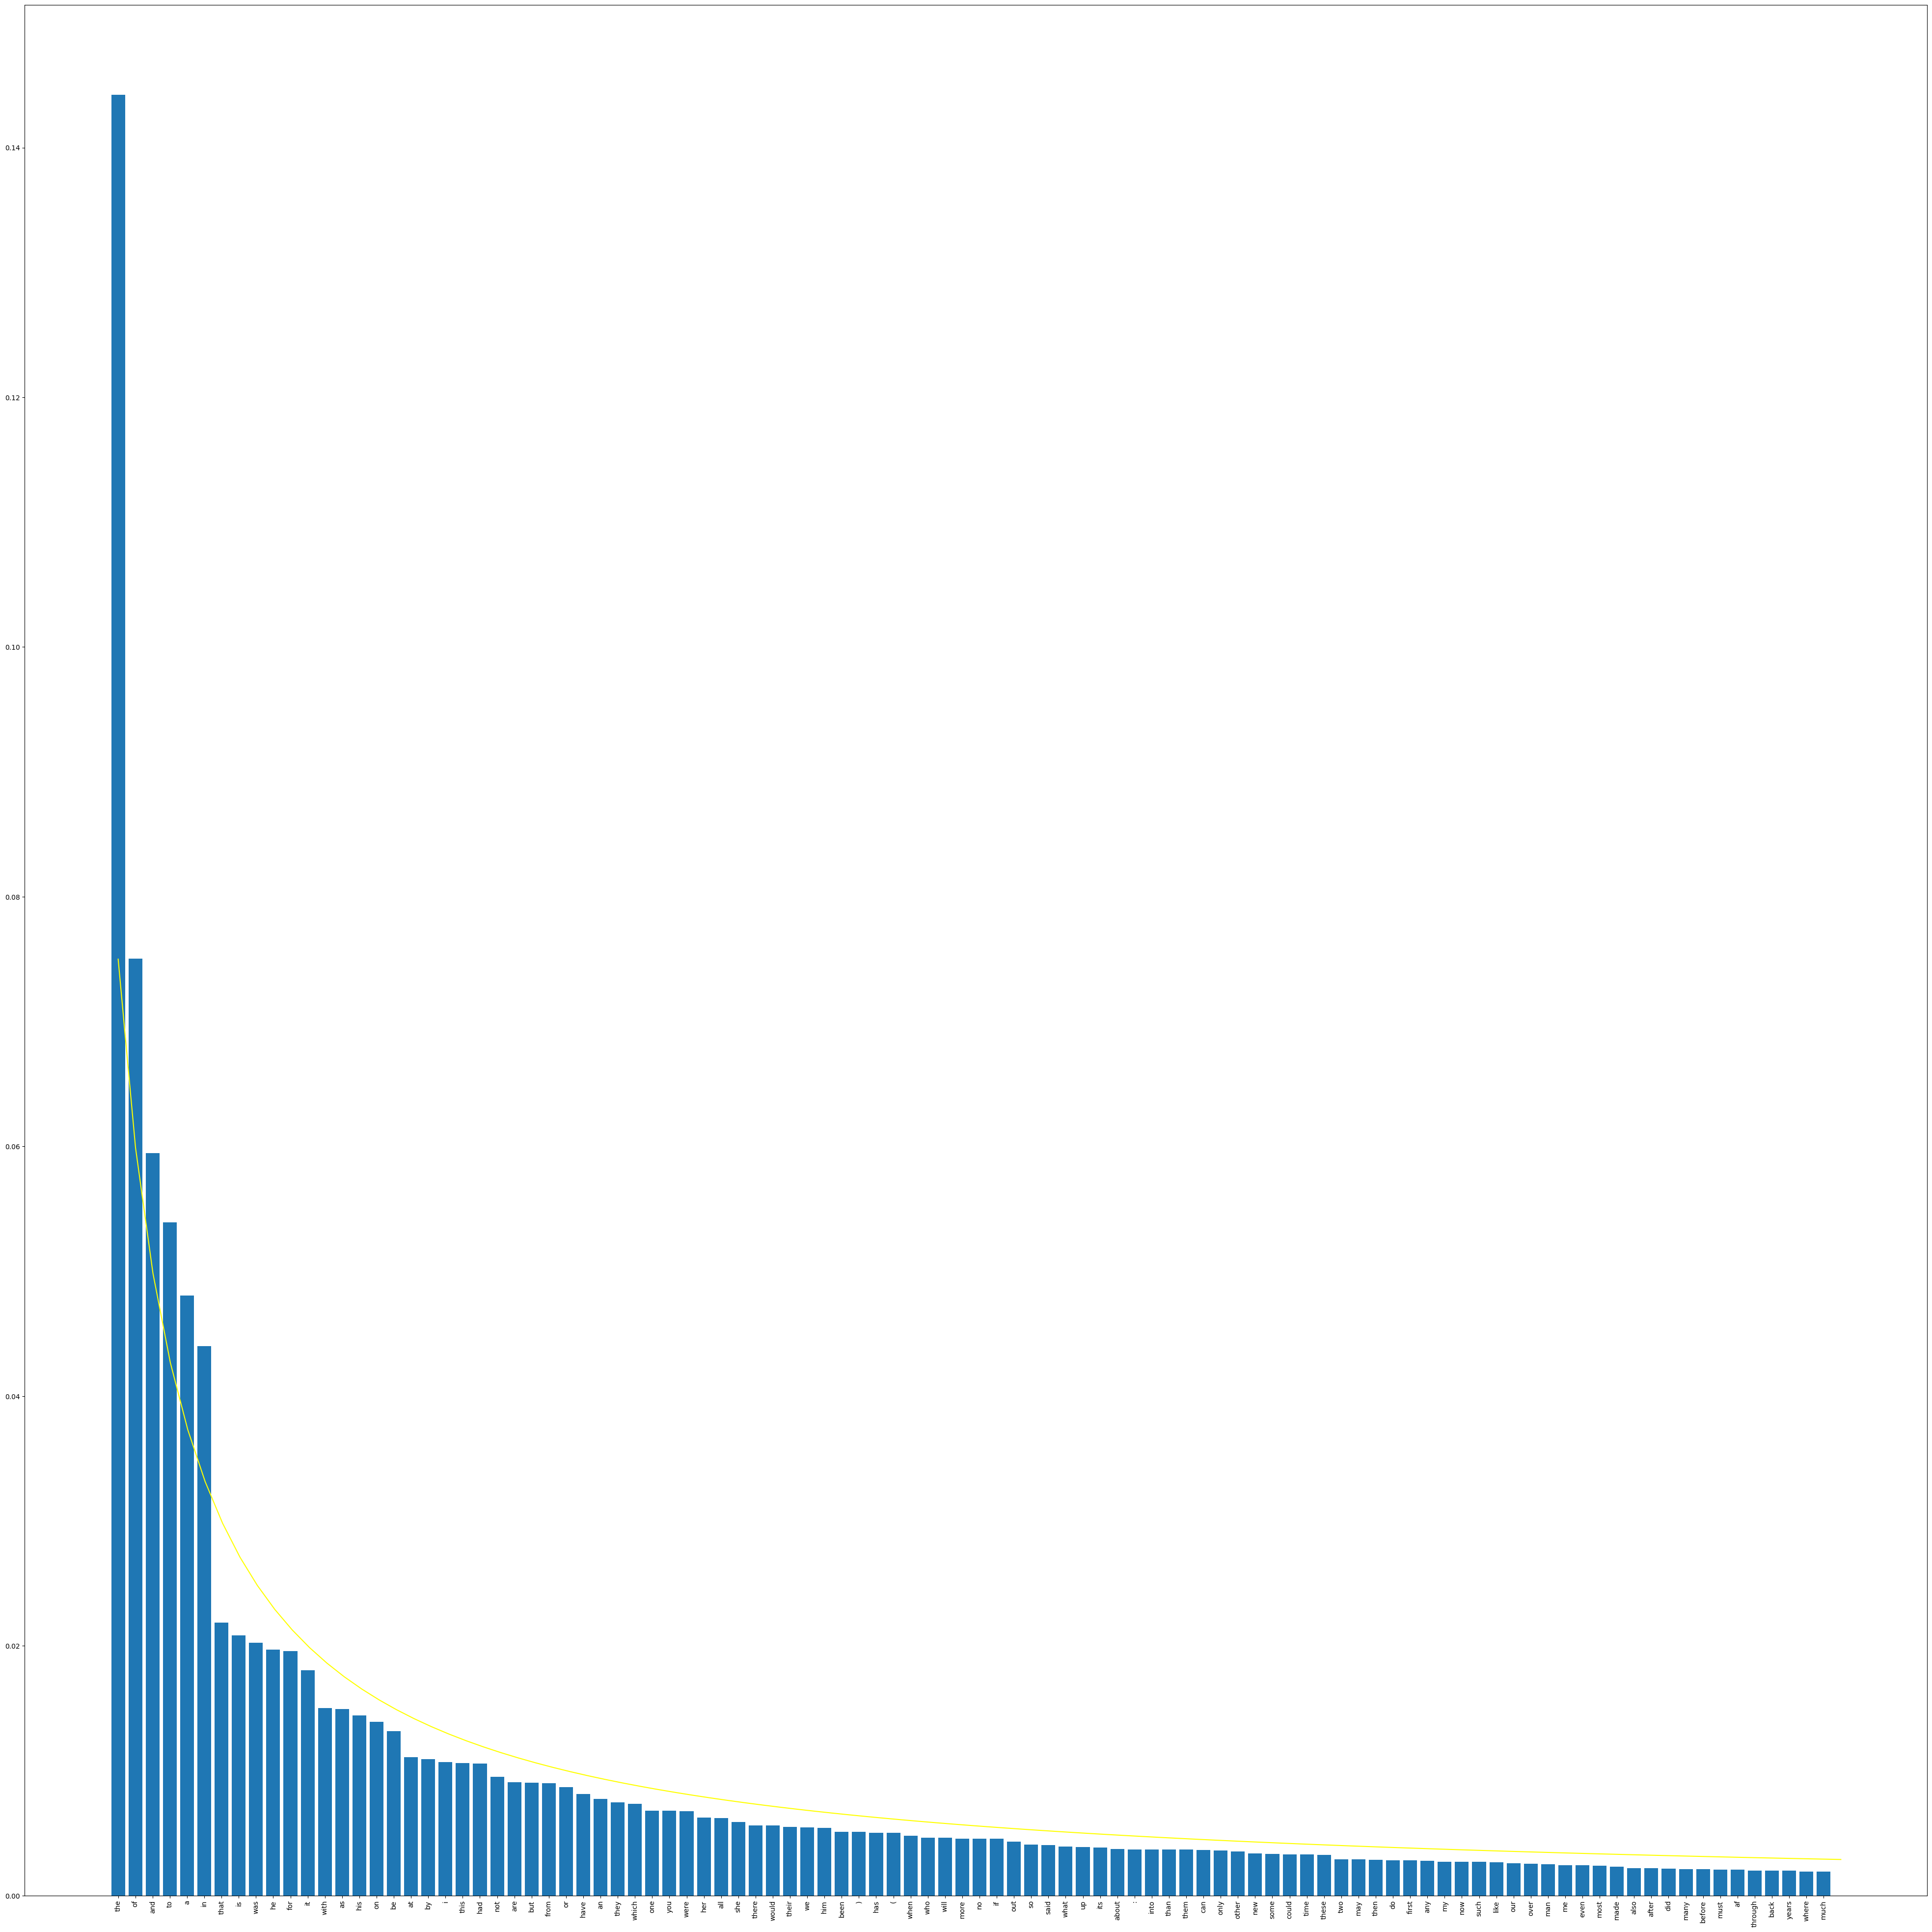

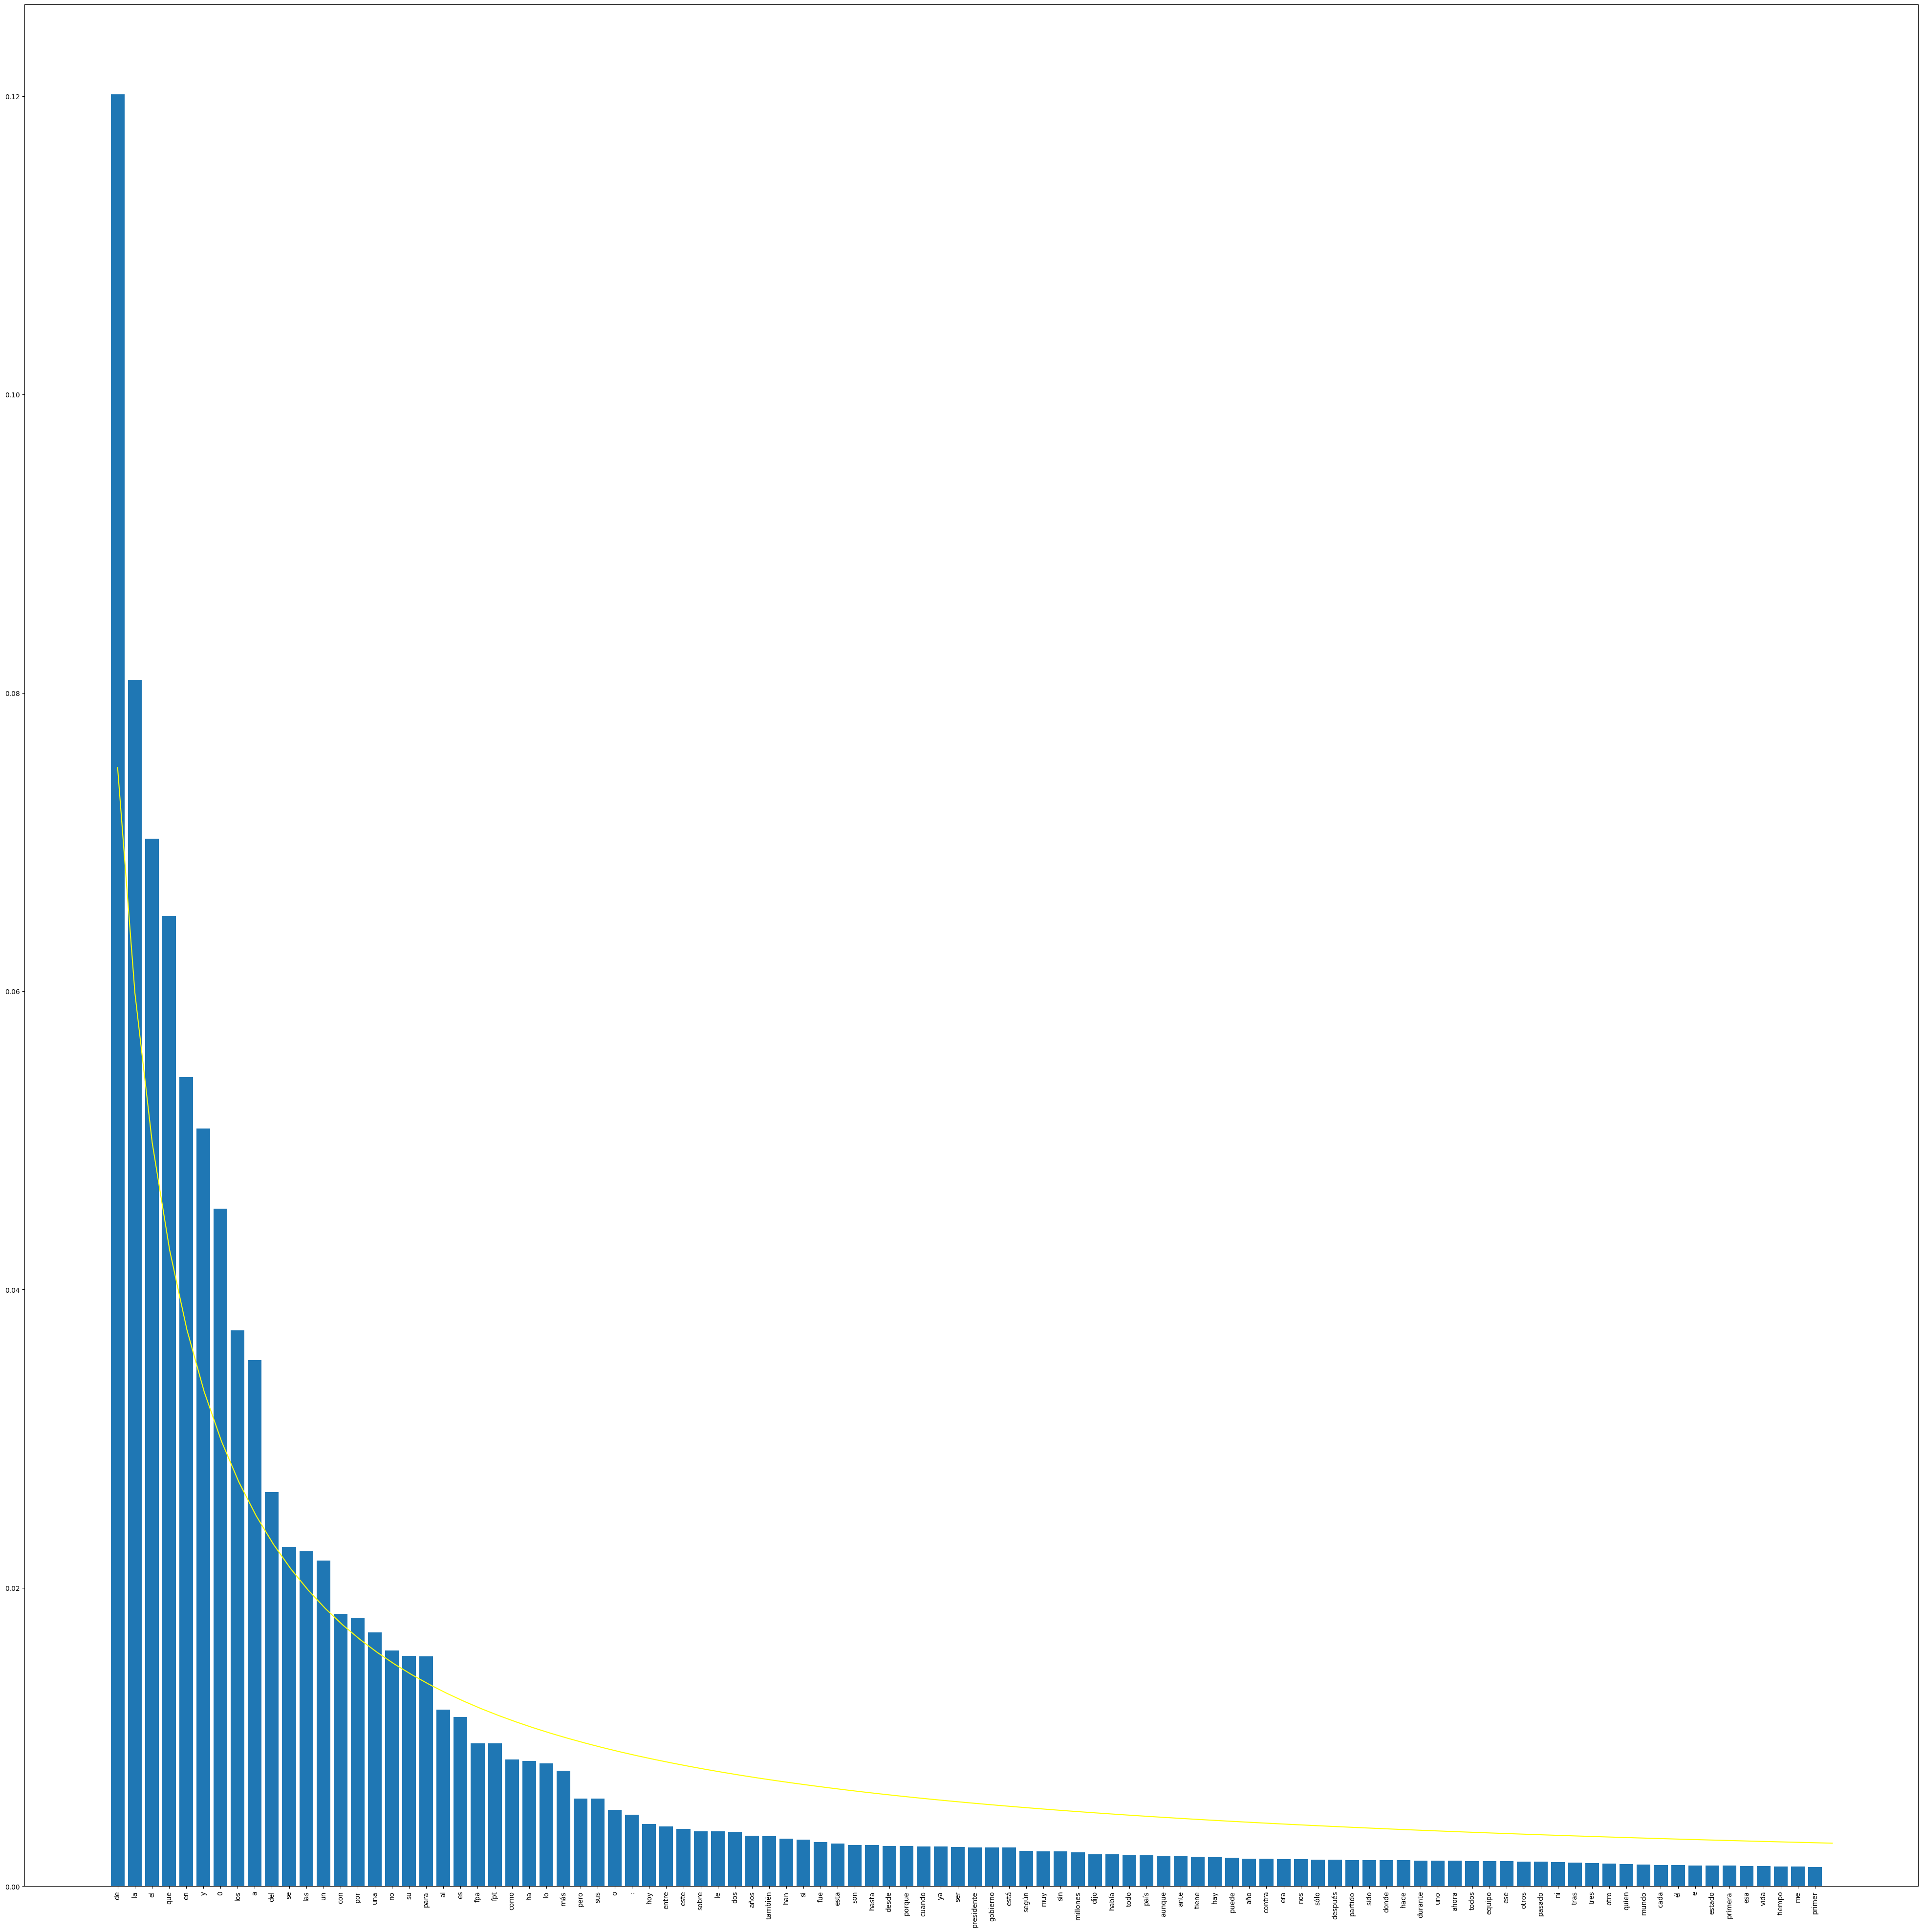

In [7]:
for dataset in [english, spanish]:
  words = dataset.words()[:]
  plt.figure(figsize=(50, 50))
  plot_common_word_histogram(" ".join(words), top_k=100)
  plt.show()

You can check the term vectors of some of the documents below:

# Back to term vectors

In [8]:
term_dict = get_term_dictionary(docs)
print(term_dict)

{'cats': 0, 'dogs': 1, 'trees': 2, 'fields': 3, 'binary': 4, 'photosynthesis': 5, 'whiskers': 6, 'animals': 7, 'holes': 8, 'nature': 9}


In [9]:
which_doc = 2
print("document snippet:", docs[which_doc][:80])
tv = get_documents_term_vector(docs[which_doc], term_dict)
print(tv)

document snippet:  [#1 times 3] The purring of a cat is often associated with contentment,
but it 
[3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [10]:
print(get_human_readable_term_vector(tv, keywords))

[('cats', np.float64(3.0))]


Lets build the big matrix describing all our documents (aka our corpus).

In [11]:
M = get_term_vector_matrix(docs)
print(M)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 0. 0. 0. 0. 0.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [2. 0. 0. 0. 0. 0. 3. 0. 0. 0.]
 [0. 2. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 3. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
 [2. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 3. 0. 0. 0. 0. 0. 1. 0. 0.]
 [3. 3. 0. 0. 0. 0. 1. 1. 0. 1.]
 [0. 0. 2. 1. 0. 0. 0. 0. 0. 0.]]


# Part II: Distances and dissimilarities

## Euclidean distance
The Euclidean distance between two vectors $p,q$ in $\mathbb{R}^d$ is defined as $\sqrt{\sum_{i=1}^d (p_i-q_i)^2 }$

> It's similar to computing the hypothenuse of a right triangle in two dimensions: $\sqrt{x^2 +y^2}$

This distance comes from the Euclidean norm (aka $L2$ norm), which measures the distance of a vector from the *origin* (the 0 vector), or in other words the magnitude (length) of a vector $v$: $\|v\|_2 = \sqrt{\sum_{i=1}^{d} v_i^2}$. The distance between $p,q$ is just $\|p-q\|_2$.

> That's why we'll often use the np.linalg.norm, which (by default) computes this $L2$ norm of a given vector.

## Cosine similarity
The cosine similarity between two vectors $p,q$ in $\mathbb{R}^d$ is defined as $\frac{⟨p, q⟩}{ \|p\|_2 \|q\|_2} = \frac{\sum_{i=1}^d p_i q_i }{ \|p\|_2 \|q\|_2}$, which returns the cosine of the angle between $p$ and $q$.

> $⟨p, q⟩$ denotes the usual dot product (technically the standard inner product).

> **Cosine dissimilarity** is just $1 -$ cosine similarity. So the value of 0 means **completely similar**, and 1 means **completely dissimilar**.

In [12]:
def eucl_distance(v, w):
  v = np.asarray(v)
  return np.linalg.norm(v-w)

def cosine_dissimilarity(v, w):
  return 1 - np.dot(v,w)/(np.linalg.norm(v) * np.linalg.norm(w)) # simple in any dimension!

# any other we could add?
#

# Let's play with this.

#Task 1:

Choose some term vectors from $M$, compute the distance/dissimilarity between them, and check how it works. Does the cosine dissimilary work better than the Euclidean distance?



In [40]:
doc_index_1 = 8
doc_index_2 = 9
print(eucl_distance(M[doc_index_1], M[doc_index_2]))
print(cosine_dissimilarity(M[doc_index_1], M[doc_index_2]))

1.0
0.0


In [41]:
print(docs[doc_index_1][:100])
print(docs[doc_index_2][:100])
print(M[[doc_index_1, doc_index_2]])

Ancient cultures revered sacred trees as symbols of
life and growth, often attributing spiritual sig
A spanning tree of a graph is a subgraph that includes
all the vertices and is also a tree, crucial 
[[0. 0. 3. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]]


# Finding nearest vectors

We can also easily find the nearest vector (among the rows of our matrix $M$) to a given query vector.

Remember that by computing the nearest vectors, we really want to find the most similar
documents (to our query vector).

In [18]:
def find_nearest_k(q, M, k):
  return sorted([(eucl_distance(q, v), i) for i,v in enumerate(M)])[:k]

def find_nearest_k_cosine(q, M, k):
  return sorted([(cosine_dissimilarity(q, v), i) for i,v in enumerate(M)])[:k]

#Task 2:

Play with the code below, by choosing different query term vectors.

* Is there anything that bothers you?
Hint: text at index 0, 1 have a special relationship!

* Can you think about any undesirable behaviours? Maybe we're not doing things right?

In [19]:
D = len(keywords)

# you can either tune the chosen coordinates of your query
query_term_vector = np.zeros(len(keywords)) # [0,0,0...]
query_term_vector[keywords.index("cats")] = 1 # how much is it about cats?
query_term_vector[keywords.index("dogs")] = 0 # ... and dogs
query_term_vector[keywords.index("trees")] = 0 #
query_term_vector[keywords.index("binary")] = 0 #

# Alternatively, we can also set it directly as:
# query_term_vector = [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.]
# query_term_vector = [100.]*10

print(f"Your query term-vector as a vector in R^{D}: {query_term_vector}")

nearest = find_nearest_k(query_term_vector, M, 3)

for i, (d, ind) in enumerate(nearest):
  print(f'#{i+1} nearest doc at dist {d : .4} and index {ind}\n term-vector:{M[ind]} \n {get_human_readable_term_vector(M[ind], keywords)} \n snippet: "{docs[ind][:100]}..."\n')

print("cosine:")

nearest_cosine = find_nearest_k_cosine(query_term_vector, M, 3)

for i, (d, ind) in enumerate(nearest_cosine):
  print(f'#{i+1} nearest doc at dist {d : .4} and index {ind}\n term-vector:{M[ind]} \n {get_human_readable_term_vector(M[ind], keywords)} \n snippet: "{docs[ind][:100]}..."\n')


Your query term-vector as a vector in R^10: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
#1 nearest doc at dist  0.0 and index 0
 term-vector:[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 [('cats', np.float64(1.0))] 
 snippet: "The purring of a cat is often associated with contentment,
but it can also indicate pain relief and ..."

#2 nearest doc at dist  1.414 and index 5
 term-vector:[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] 
 [('holes', np.float64(1.0))] 
 snippet: "Black holes, predicted by Einstein's theory of
general relativity, have such strong gravitational ef..."

#3 nearest doc at dist  1.414 and index 12
 term-vector:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 
 [('trees', np.float64(1.0))] 
 snippet: "The growth rings of trees, visible in cross-sections
of trunks, hold records of environmental change..."

cosine:
#1 nearest doc at dist  0.0 and index 0
 term-vector:[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 [('cats', np.float64(1.0))] 
 snippet: "The purring of a cat is often associated with contentment,
but it can also indicate

# Followup discussion

* Can you offer a geometric interpretation of the cosine dissimilarity?

* Could we make the Euclidean distance work better by changing the data somehow?

* We can compute some other distance between the term vectors! Look up info on Hamming distance, Manhattan (L1) distance, Jackard index... Feel free to implement it and test it.

* Can you think and discuss how using a specific distance would change the behaviour of our method?

# Extra tasks and topics (for people who are done with the standard tasks)
* Try to implement some of these other methods and check how they work!
> Remember how to compute the cosine of two vectors in 2D? It works the same in any dimension!

* Do you remember the definition of a metric? Are all of the above metric distances? Would it matter?

* Do you think that a distance measure which is non-symmetic would make sense ($d(v,w) \neq d(w,v)$)? Do you know any such distance?

* Note that to find the nearest neighbour, we went through all the vectors. We'll learn to do this much more efficiently later. How can we do this in this case (say there are millions of text documents, but still 10 keywords). Can you implement it?

* If there were, say, $10^6$ keywords -- how does this change the problem? Can you propose an efficient solution? Can you implement it?

* Does the Zipf distribution affect any of these considerations?